In [2]:
import salishsea_tools
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
from salishsea_tools import geo_tools

In [3]:
nc_file = "/home/sallen/MEOPAR/grid/mesh_mask202108.nc"
nc_to_plot = nc.Dataset(nc_file)

#bathy, X, Y = tidetools.get_bathy_data(nc_to_plot)
X = nc_to_plot.variables["nav_lon"][:, :]
Y = nc_to_plot.variables["nav_lat"][:, :]

lat = 48.22
lon = -122.58

Y_model, X_model = geo_tools.find_closest_model_point(lon,lat,X,Y)
print(X_model) 
print(Y_model)


289
205


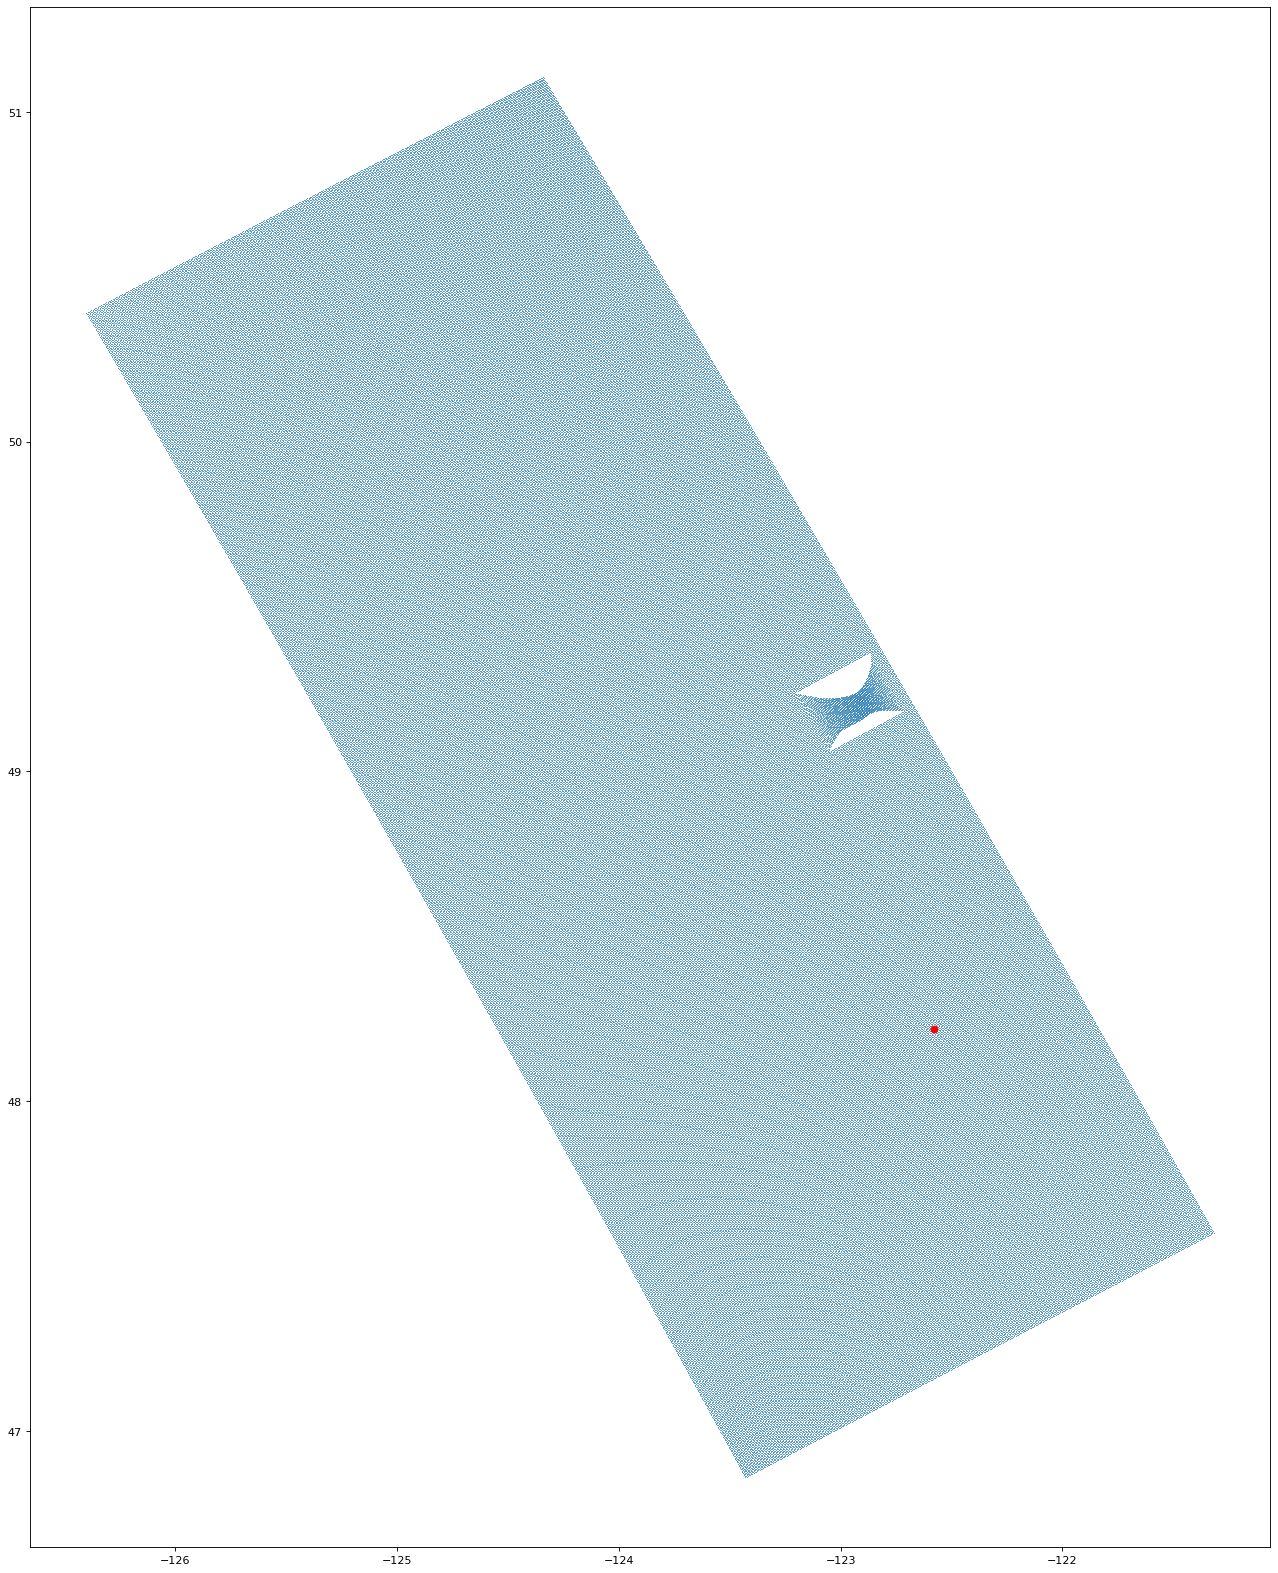

In [4]:
fig = plt.figure(figsize=(20, 25), dpi=80)
plt.scatter(X,Y, s=0.5, linewidth=0)
#plt.scatter(lon_model,lat_model, c='r')
plt.scatter(lon,lat, c='r')

<xarray.Dataset> Size: 788MB
Dimensions:       (y: 898, x: 398, t: 1, z: 40)
Dimensions without coordinates: y, x, t, z
Data variables: (12/43)
    nav_lon       (y, x) float32 1MB ...
    nav_lat       (y, x) float32 1MB ...
    time_counter  (t) datetime64[ns] 8B ...
    tmask         (t, z, y, x) int8 14MB ...
    umask         (t, z, y, x) int8 14MB ...
    vmask         (t, z, y, x) int8 14MB ...
    ...            ...
    gdepv         (t, z, y, x) float32 57MB ...
    gdepw_0       (t, z, y, x) float32 57MB ...
    gdept_1d      (t, z) float64 320B ...
    gdepw_1d      (t, z) float64 320B ...
    e3t_1d        (t, z) float64 320B ...
    e3w_1d        (t, z) float64 320B ...
Attributes:
    file_name:    grid/mesh_mask202108.nc
    TimeStamp:    07/08/2021 17:25:49 -0700
    Conventions:  CF-1.6
    title:        SalishSeaCast NEMO bathymetry_202108 Bathymetry Mesh Mask
    institution:  Dept of Earth, Ocean & Atmospheric Sciences, University of ...
    source:       NEMO-3.6 SalishSeaCast configuration
    references:   https://github.com/SalishSeaCast/tools/blob/main/bathymetry...
    history:      [2021-08-07 17:25] ncks -4 -L4 -O mesh_mask.nc mesh_mask202...

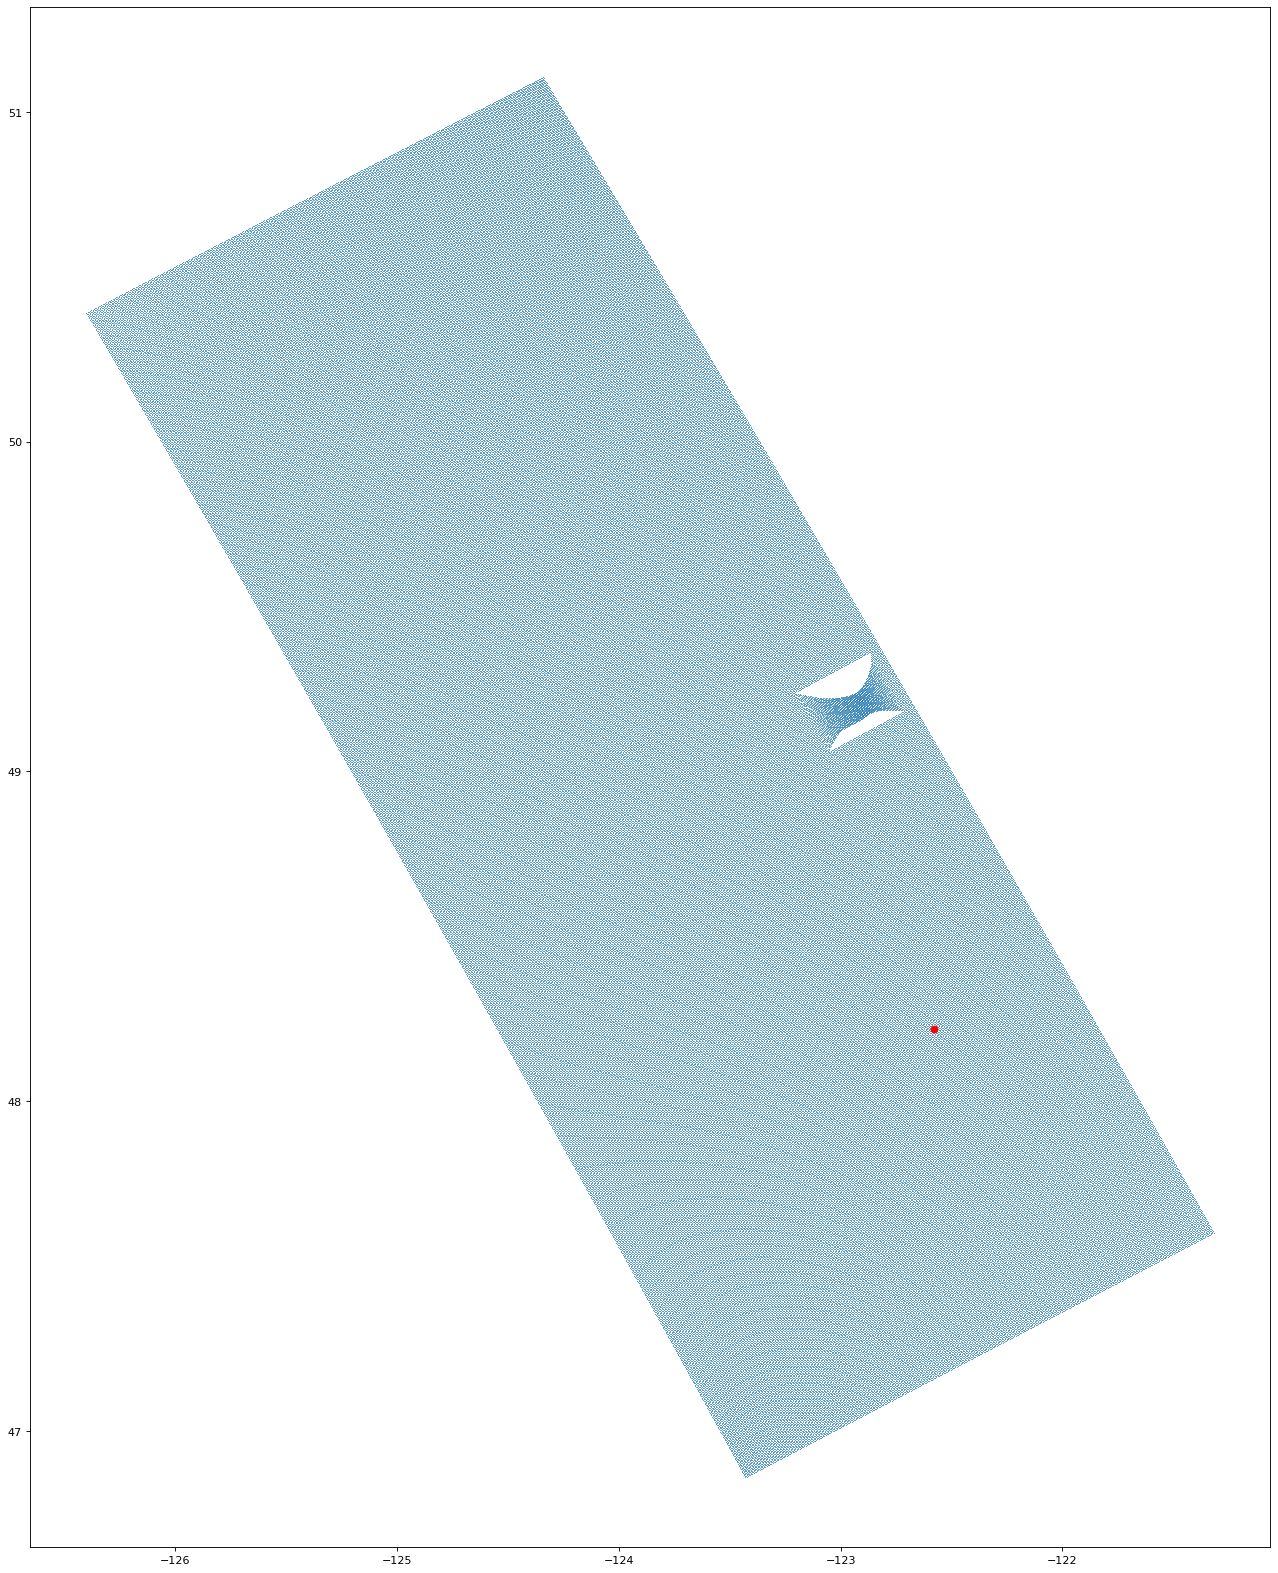

In [5]:

# nc_file = "/home/sallen/MEOPAR/grid/SalishSea2_mapping.nc"
# nc_file = "/home/sallen/MEOPAR/grid/grid_from_lat_lon_mask999.nc"
nc_to_plot = xr.open_dataset(nc_file)

i,j = 143, 84 
# print(nc_to_plot.jj[i,j])

# lon = nc_to_plot.jj[i,j].lons
# lat = nc_to_plot.jj[i,j].lats

fig = plt.figure(figsize=(20, 25), dpi=80)
plt.scatter(X,Y, s=0.5, linewidth=0)
#plt.scatter(lon_model,lat_model, c='r')
plt.scatter(lon,lat, c='r')

nc_to_plot

AttributeError: 'Dataset' object has no attribute 'indexi'

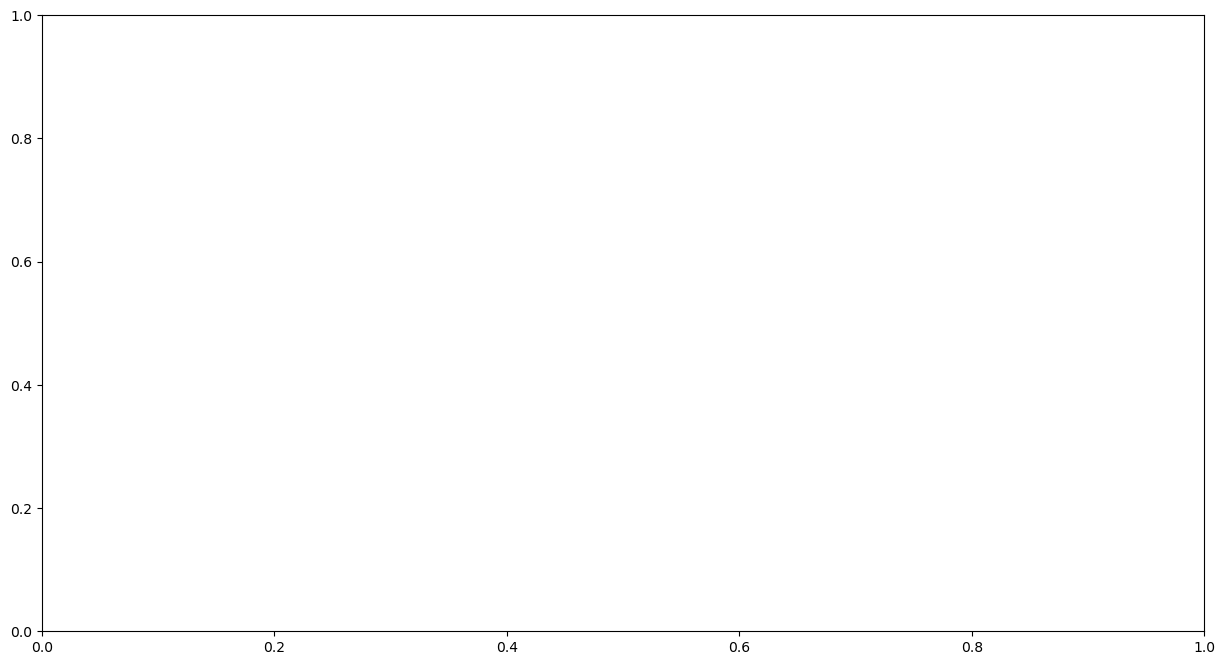

In [6]:
# Plotting eddy problem
mesh = '/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc'
SSCmesh = xr.open_dataset(nc_file)

i,j,k = 143,          84,          20

fig, ax = plt.subplots(1,1,figsize=(15,8))

ax.contourf(SSCmesh.indexi, SSCmesh.indexj, levels=[-0.01, 0.01], colors='lightgray')
ax.contour(SSCmesh.indexi, SSCmesh.indexi, levels=[-0.01, 0.01], colors='k')
ax.set_xlim([-123.3, -122.4])
ax.set_ylim([47.2, 48])
ax.set_aspect(5/4.4)
ax.grid

SSCmesh.indexi

In [7]:
SSCmesh.indexi

AttributeError: 'Dataset' object has no attribute 'indexi'

In [8]:
print(SSCmesh.indexj)

AttributeError: 'Dataset' object has no attribute 'indexj'

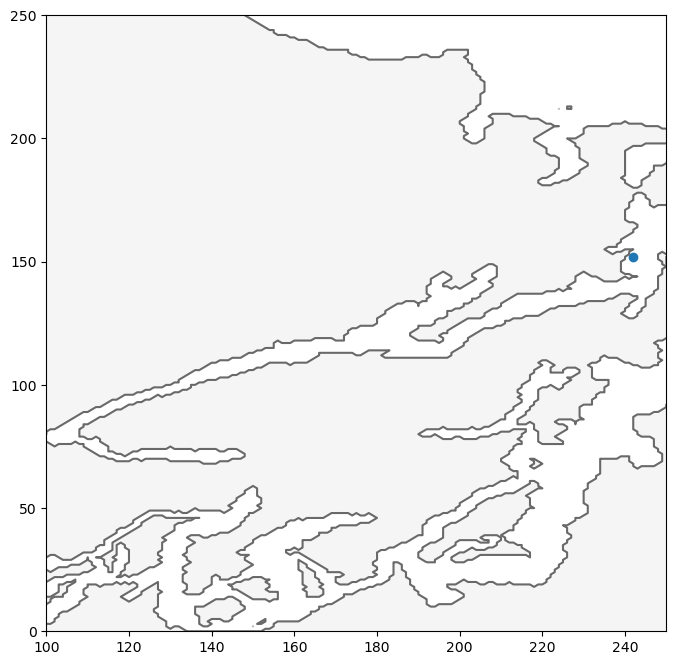

In [11]:
# Load grid and mask files
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_ylim([0, 250])
ax.set_xlim([100, 250])
# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgray')
i,j,k = 242,152,20
ax.scatter(i,j)

In [12]:
mesh

<xarray.Dataset> Size: 788MB
Dimensions:       (y: 898, x: 398, t: 1, z: 40)
Dimensions without coordinates: y, x, t, z
Data variables: (12/43)
    nav_lon       (y, x) float32 1MB ...
    nav_lat       (y, x) float32 1MB ...
    time_counter  (t) datetime64[ns] 8B ...
    tmask         (t, z, y, x) int8 14MB ...
    umask         (t, z, y, x) int8 14MB ...
    vmask         (t, z, y, x) int8 14MB ...
    ...            ...
    gdepv         (t, z, y, x) float32 57MB ...
    gdepw_0       (t, z, y, x) float32 57MB ...
    gdept_1d      (t, z) float64 320B ...
    gdepw_1d      (t, z) float64 320B ...
    e3t_1d        (t, z) float64 320B ...
    e3w_1d        (t, z) float64 320B ...
Attributes:
    file_name:    grid/mesh_mask202108.nc
    TimeStamp:    07/08/2021 17:25:49 -0700
    Conventions:  CF-1.6
    title:        SalishSeaCast NEMO bathymetry_202108 Bathymetry Mesh Mask
    institution:  Dept of Earth, Ocean & Atmospheric Sciences, University of ...
    source:       NEMO-3.6 SalishSeaCast configuration
    references:   https://github.com/SalishSeaCast/tools/blob/main/bathymetry...
    history:      [2021-08-07 17:25] ncks -4 -L4 -O mesh_mask.nc mesh_mask202...

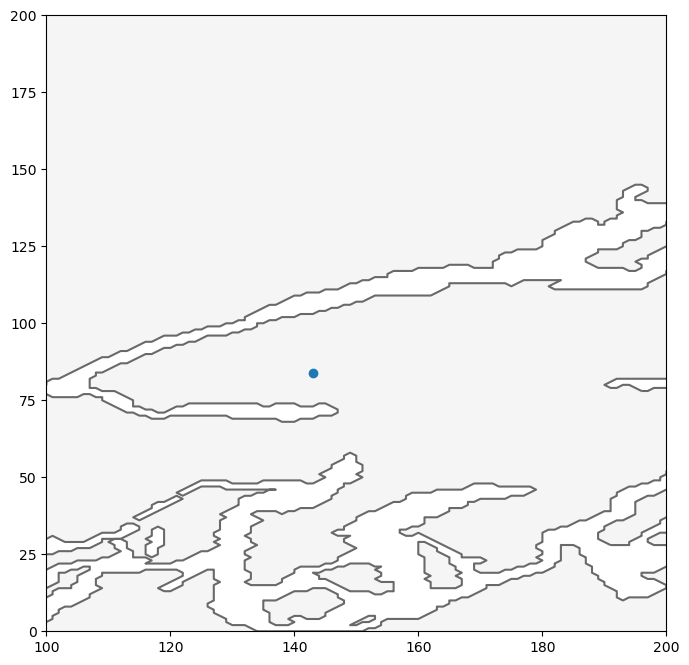

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_ylim([0, 200])
ax.set_xlim([100, 200])
# Overlay domain landmask and coastline
ax.contourf(mesh.umask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.umask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgray')
i,j = 143, 84 
ax.scatter(i,j)

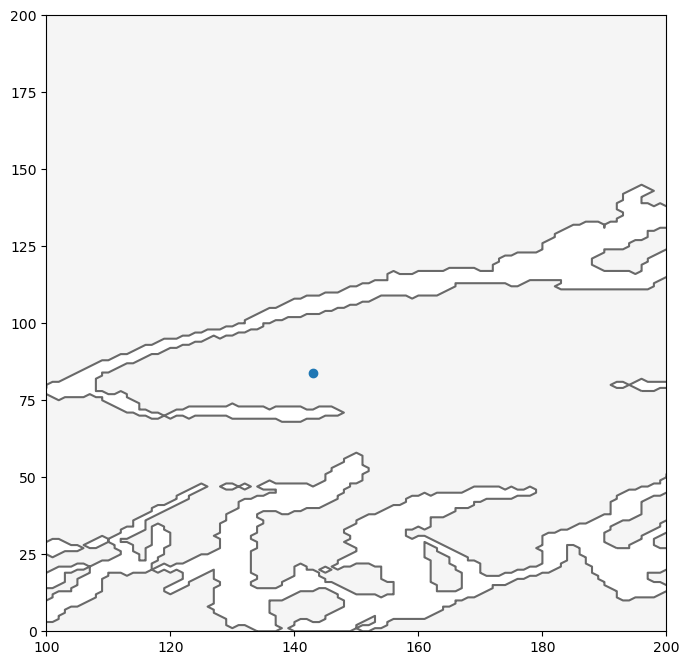

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_ylim([0, 200])
ax.set_xlim([100, 200])
# Overlay domain landmask and coastline
ax.contourf(mesh.vmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.vmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgray')
i,j = 143, 84 
ax.scatter(i,j)

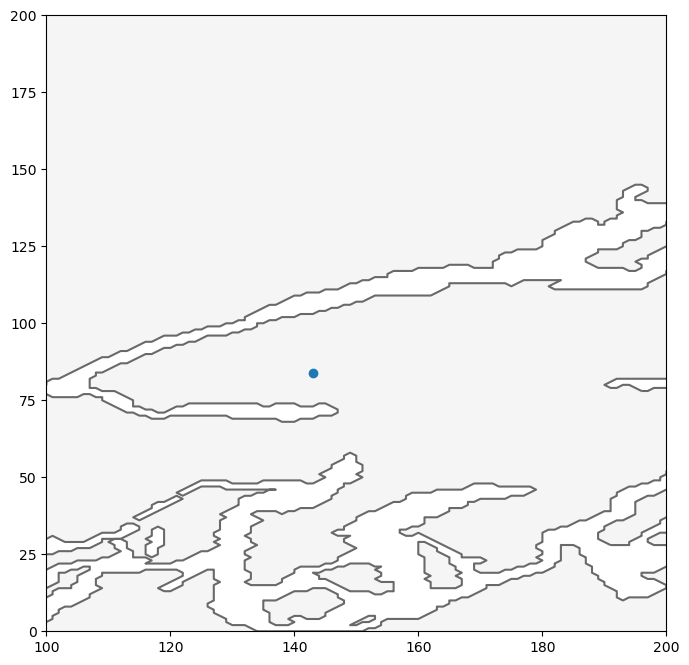

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_ylim([0, 200])
ax.set_xlim([100, 200])
# Overlay domain landmask and coastline
ax.contourf(mesh.umask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.umask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgray')
i,j = 143, 84 
ax.scatter(i,j)

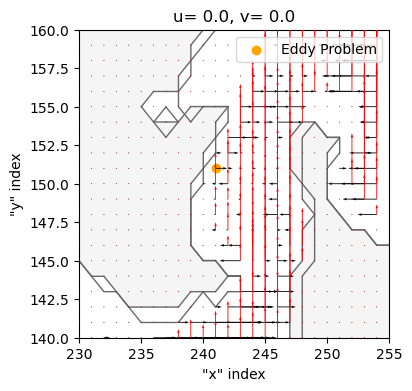

In [19]:
# lets try to get on one plot
grid = mesh
#grid = xr.open_dataset('/data1/bbeutel/LO_output/grid/grid.nc')
#grid = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
#grid = xr.open_dataset('/home/sallen/MEOPAR/grid/grid_from_lat_lon_mask999.nc')
i,j,k = 242,152,20
# failed on 2018.09.27/ocean_his_0021.nc, with 66 days left in the run :(
dataU = xr.open_dataset("/ocean/ghoeven/MOAD/ariane-2.3.0_03/quantExamplePuget/Links/SalishSea_1h_000001_grid_U.nc")
dataV = xr.open_dataset("/ocean/ghoeven/MOAD/ariane-2.3.0_03/quantExamplePuget/Links/SalishSea_1h_000001_grid_V.nc")
dataW = xr.open_dataset("/ocean/ghoeven/MOAD/ariane-2.3.0_03/quantExamplePuget/Links/SalishSea_1h_000001_grid_W.nc")
#data2 = xr.open_dataset("/data1/parker/LO_roms/cas6_v0_live/f2018.09.27/ocean_his_0021.nc")
k=20-1
# i,j = 143, 84 
# Make plot area

fig, ax = plt.subplots(1,1,figsize=(4,4))
xmin, xmax = 230,255
ymin, ymax = 140,160

ax.set_ylim([ymin,ymax])
ax.set_xlim([xmin,xmax])
ax.set_ylabel('"y" index')
ax.set_xlabel('"x" index')
    


###########
# first u #
###########

# Overlay domain landmask and coastline
ax.contourf(grid.umask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke',zorder=1)
ax.contour(grid.umask[0, 0, ...], linewidths=1, levels=[-0.01, 0.01], colors='dimgray',zorder=2)

X,Y = np.meshgrid(np.arange(xmin,xmax), np.arange(ymin,ymax))

# QUIVER! 
#ax.quiver(X[ymin:ymax,xmin:xmax],Y[ymin:ymax,xmin:xmax],dataU.vozocrtx[0,k,ymin:ymax,xmin:xmax],np.zeros(np.shape(dataV.vomecrty[0,k,ymin:ymax,xmin:xmax])),scale=3,zorder=3)
ax.quiver(X,Y,dataU.vozocrtx[0,k,ymin:ymax,xmin:xmax],np.zeros(np.shape(dataV.vomecrty[0,k,ymin:ymax,xmin:xmax])),scale=3,zorder=3)

#########
# now v #
#########
# Overlay domain landmask and coastline
# ax.contourf(X, Y, grid.mask_v, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(grid.vmask[0, 0, ...], linewidths=1, levels=[-0.01, 0.01], colors='dimgray',zorder=2)

ax.set_title('u= '+str(dataU.vozocrtx[0,k,242-1,152-1].values)+', v= '+str(dataV.vomecrty[0,k,242-1,152-1].values))

# QUIVER! 
ax.quiver(X,Y,np.zeros(np.shape(dataU.vozocrtx[0,k,ymin:ymax,xmin:xmax])),dataV.vomecrty[0,k,ymin:ymax,xmin:xmax],scale=3,color='r',zorder=3)

#point with error
ax.scatter(242-1,152-1,c='orange', label='Eddy Problem')
ax.legend(loc="upper right")

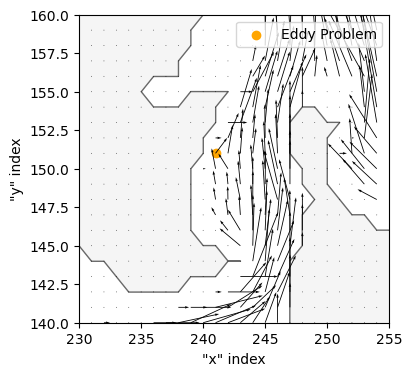

In [20]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
xmin, xmax = 230,255
ymin, ymax = 140,160

ax.set_ylim([ymin,ymax])
ax.set_xlim([xmin,xmax])
ax.set_ylabel('"y" index')
ax.set_xlabel('"x" index')
    


###########
# Combined arrows #
###########

# Overlay domain landmask and coastline
ax.contourf(grid.umask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke',zorder=1)
ax.contour(grid.umask[0, 0, ...], linewidths=1, levels=[-0.01, 0.01], colors='dimgray',zorder=2)

X,Y = np.meshgrid(np.arange(xmin,xmax), np.arange(ymin,ymax))

# QUIVER! 
#ax.quiver(X[ymin:ymax,xmin:xmax],Y[ymin:ymax,xmin:xmax],dataU.vozocrtx[0,k,ymin:ymax,xmin:xmax],np.zeros(np.shape(dataV.vomecrty[0,k,ymin:ymax,xmin:xmax])),scale=3,zorder=3)
ax.quiver(X,Y,dataU.vozocrtx[0,k,ymin:ymax,xmin:xmax],dataV.vomecrty[0,k,ymin:ymax,xmin:xmax],scale=3,zorder=3)

#point with error
ax.scatter(242-1,152-1,c='orange', label='Eddy Problem')
ax.legend(loc="upper right")

In [46]:
grid.umask[0,0,...,...].values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(898, 398), dtype=int8)